# Importing the required libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import requests
import os
import plotly.graph_objects as go
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

In [2]:
# setting the default option of columns and rows with the no of columns
pd.set_option('display.max_columns',88)
pd.set_option('display.max_rows',88)

# DATA COLLECTION : Getting Data from Fantasy Premier League API

To use the Fantasy Premier League API, send HTTP requests to their endpoints. To access FPL data, send GET requests to the appropriate endpoints, and you'll usually receive a JSON file in return.

In [3]:
import requests

# Define the URL of the FPL API endpoint for player data
url = "https://fantasy.premierleague.com/api/bootstrap-static/"

# Send an HTTP GET request to the FPL API
response = requests.get(url)
json_file = response.json()
type

type

In [4]:
json_file.keys()

dict_keys(['events', 'game_settings', 'phases', 'teams', 'total_players', 'elements', 'element_stats', 'element_types'])

# DATA CLEANING AND EXPLORATION

Events

In [5]:
fpl_events = pd.DataFrame(json_file['events'])
fpl_events.head()

,id,name,deadline_time,average_entry_score,finished,data_checked,highest_scoring_entry,deadline_time_epoch,deadline_time_game_offset,highest_score,is_previous,is_current,is_next,cup_leagues_created,h2h_ko_matches_created,chip_plays,most_selected,most_transferred_in,top_element,top_element_info,transfers_made,most_captained,most_vice_captained
0,1,Gameweek 1,2023-08-11T17:30:00Z,64,True,True,3383750.0,1691775000,0,127.0,False,False,False,False,False,"[{'chip_name': 'bboost', 'num_played': 163222}...",355.0,1.0,395.0,"{'id': 395, 'points': 14}",0,355.0,19.0
1,2,Gameweek 2,2023-08-18T17:15:00Z,44,True,True,3338487.0,1692378900,0,120.0,False,False,False,True,True,"[{'chip_name': 'bboost', 'num_played': 126778}...",355.0,195.0,108.0,"{'id': 108, 'points': 16}",13130353,355.0,19.0
2,3,Gameweek 3,2023-08-25T17:30:00Z,44,True,True,9368956.0,1692984600,0,128.0,False,False,False,True,True,"[{'chip_name': 'bboost', 'num_played': 124110}...",355.0,108.0,216.0,"{'id': 216, 'points': 19}",17619532,355.0,19.0
3,4,Gameweek 4,2023-09-01T17:30:00Z,72,True,True,4354697.0,1693589400,0,148.0,False,False,False,True,True,"[{'chip_name': 'bboost', 'num_played': 109196}...",355.0,216.0,516.0,"{'id': 516, 'points': 20}",16035365,355.0,19.0
4,5,Gameweek 5,2023-09-16T10:00:00Z,44,True,True,6211182.0,1694858400,0,102.0,False,False,False,True,True,"[{'chip_name': 'bboost', 'num_played': 96469},...",355.0,516.0,344.0,"{'id': 344, 'points': 13}",14363988,355.0,19.0


 Game Setttings

In [6]:
json_file['game_settings'].keys()

dict_keys(['league_join_private_max', 'league_join_public_max', 'league_max_size_public_classic', 'league_max_size_public_h2h', 'league_max_size_private_h2h', 'league_max_ko_rounds_private_h2h', 'league_prefix_public', 'league_points_h2h_win', 'league_points_h2h_lose', 'league_points_h2h_draw', 'league_ko_first_instead_of_random', 'cup_start_event_id', 'cup_stop_event_id', 'cup_qualifying_method', 'cup_type', 'squad_squadplay', 'squad_squadsize', 'squad_team_limit', 'squad_total_spend', 'ui_currency_multiplier', 'ui_use_special_shirts', 'ui_special_shirt_exclusions', 'stats_form_days', 'sys_vice_captain_enabled', 'transfers_cap', 'transfers_sell_on_fee', 'league_h2h_tiebreak_stats', 'timezone'])

Phases

In [7]:
fpl_phases = pd.DataFrame(json_file['phases'])
fpl_phases.head()

,id,name,start_event,stop_event
0,1,Overall,1,38
1,2,August,1,3
2,3,September,4,7
3,4,October,8,10
4,5,November,11,13


 Teams

In [8]:
fpl_teams = pd.DataFrame(json_file['teams'])
fpl_teams.head()

,code,draw,form,id,loss,name,played,points,position,short_name,strength,team_division,unavailable,win,strength_overall_home,strength_overall_away,strength_attack_home,strength_attack_away,strength_defence_home,strength_defence_away,pulse_id
0,3,0,None,1,0,Arsenal,0,0,0,ARS,4,None,False,0,1230,1285,1250,1250,1210,1320,1
1,7,0,None,2,0,Aston Villa,0,0,0,AVL,3,None,False,0,1115,1175,1130,1190,1100,1160,2
2,91,0,None,3,0,Bournemouth,0,0,0,BOU,3,None,False,0,1060,1095,1050,1100,1060,1090,127
3,94,0,None,4,0,Brentford,0,0,0,BRE,3,None,False,0,1125,1205,1120,1220,1130,1190,130
4,36,0,None,5,0,Brighton,0,0,0,BHA,3,None,False,0,1165,1210,1120,1200,1210,1240,131


In [9]:
json_file['total_players']

10310106

 Elements Stats:
Explains the columns in the elements dataset

In [10]:
fpl_element_stats = pd.DataFrame(json_file['element_stats'])
fpl_element_stats.head(20)

,label,name
0,Minutes played,minutes
1,Goals scored,goals_scored
2,Assists,assists
3,Clean sheets,clean_sheets
4,Goals conceded,goals_conceded
5,Own goals,own_goals
6,Penalties saved,penalties_saved
7,Penalties missed,penalties_missed
8,Yellow cards,yellow_cards
9,Red cards,red_cards


Elements Types:
Discripton about the player positions

In [11]:
fpl_element_types = pd.DataFrame(json_file['element_types'])
fpl_element_types

,id,plural_name,plural_name_short,singular_name,singular_name_short,squad_select,squad_min_play,squad_max_play,ui_shirt_specific,sub_positions_locked,element_count
0,1,Goalkeepers,GKP,Goalkeeper,GKP,2,1,1,True,[12],85
1,2,Defenders,DEF,Defender,DEF,5,3,5,False,[],241
2,3,Midfielders,MID,Midfielder,MID,5,2,5,False,[],321
3,4,Forwards,FWD,Forward,FWD,3,1,3,False,[],96


Elements:
consists of data related to the performance of the players

In [12]:
fpl_elements = pd.DataFrame(json_file['elements'])
fpl_elements.head()

,chance_of_playing_next_round,chance_of_playing_this_round,code,cost_change_event,cost_change_event_fall,cost_change_start,cost_change_start_fall,dreamteam_count,element_type,ep_next,ep_this,event_points,first_name,form,id,in_dreamteam,news,news_added,now_cost,photo,points_per_game,second_name,selected_by_percent,special,squad_number,status,team,team_code,total_points,transfers_in,transfers_in_event,transfers_out,transfers_out_event,value_form,value_season,web_name,minutes,goals_scored,assists,clean_sheets,goals_conceded,own_goals,penalties_saved,penalties_missed,yellow_cards,red_cards,saves,bonus,bps,influence,creativity,threat,ict_index,starts,expected_goals,expected_assists,expected_goal_involvements,expected_goals_conceded,influence_rank,influence_rank_type,creativity_rank,creativity_rank_type,threat_rank,threat_rank_type,ict_index_rank,ict_index_rank_type,corners_and_indirect_freekicks_order,corners_and_indirect_freekicks_text,direct_freekicks_order,direct_freekicks_text,penalties_order,penalties_text,expected_goals_per_90,saves_per_90,expected_assists_per_90,expected_goal_involvements_per_90,expected_goals_conceded_per_90,goals_conceded_per_90,now_cost_rank,now_cost_rank_type,form_rank,form_rank_type,points_per_game_rank,points_per_game_rank_type,selected_rank,selected_rank_type,starts_per_90,clean_sheets_per_90
0,0.0,0.0,232223,0,0,-1,1,0,4,0.0,0.0,0,Folarin,0.0,1,False,Transferred to Monaco,2023-08-31T08:55:15.272751Z,44,232223.jpg,0.0,Balogun,0.2,False,None,u,1,3,0,10024,0,59354,338,0.0,0.0,Balogun,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0.00,0.00,0.00,0.00,593,57,584,60,570,59,600,59,NaN,,NaN,,NaN,,0.00,0.0,0.00,0.00,0.00,0.00,523,92,539,52,606,63,304,47,0.00,0.00
1,NaN,NaN,58822,0,0,-1,1,0,2,0.5,1.0,0,Cédric,0.0,2,False,,None,39,58822.jpg,0.0,Alves Soares,0.4,False,None,a,1,3,0,27231,947,29095,966,0.0,0.0,Cédric,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0.00,0.00,0.00,0.00,455,160,436,157,411,147,461,159,NaN,,NaN,,NaN,,0.00,0.0,0.00,0.00,0.00,0.00,712,226,363,114,466,156,248,96,0.00,0.00
2,100.0,100.0,153256,0,0,-1,1,0,3,1.8,2.3,0,Mohamed,1.3,3,False,,2023-08-11T13:00:06.079379Z,44,153256.jpg,4.0,Elneny,0.1,False,None,a,1,3,4,11501,447,14245,492,0.3,0.9,M.Elneny,1,0,1,0,0,0,0,0,0,0,0,0,12,1.8,0.5,2.0,0.4,0,0.00,0.00,0.00,0.00,441,206,417,208,395,197,443,207,NaN,,NaN,,NaN,,0.00,0.0,0.00,0.00,0.00,0.00,491,281,217,103,57,31,401,129,0.00,0.00
3,0.0,100.0,438098,0,0,-1,1,0,3,0.0,2.7,-2,Fábio,1.7,4,False,Suspended until 09 Dec,2023-11-12T02:00:08.552136Z,54,438098.jpg,2.6,Ferreira Vieira,0.1,False,None,s,1,3,21,11352,44,15736,1108,0.3,3.9,Fábio Vieira,236,1,3,1,2,0,0,0,0,1,0,0,62,79.4,63.6,77.0,21.9,2,1.20,0.35,1.55,1.48,255,102,190,112,149,91,225,110,5.0,,NaN,,4.0,,0.46,0.0,0.13,0.59,0.56,0.76,126,81,203,95,179,78,393,128,0.76,0.38
4,100.0,100.0,226597,0,0,-2,2,0,2,1.8,2.3,2,Gabriel,1.3,5,False,,2023-09-30T23:00:07.672676Z,48,226597.jpg,2.9,dos Santos Magalhães,14.9,False,None,a,1,3,29,858260,22795,2275696,19542,0.3,6.0,Gabriel,744,0,0,3,7,0,0,0,1,0,0,2,142,137.8,26.6,46.0,21.1,8,0.34,0.11,0.45,7.50,164,65,304,102,208,52,234,73,NaN,,NaN,,NaN,,0.04,0.0,0.01,0.05,0.91,0.85,302,35,227,74,145,49,23,7,0.97,0.36


Merging elements and element_types

In [13]:
feild_positions = fpl_element_types[['id','plural_name_short']]
feild_positions.rename(columns={'id':'element_type'},inplace=True)
feild_positions

,element_type,plural_name_short
0,1,GKP
1,2,DEF
2,3,MID
3,4,FWD


In [14]:
fpl_merged = pd.merge(fpl_elements,feild_positions,on='element_type',how='inner')
fpl_merged


,chance_of_playing_next_round,chance_of_playing_this_round,code,cost_change_event,cost_change_event_fall,cost_change_start,cost_change_start_fall,dreamteam_count,element_type,ep_next,ep_this,event_points,first_name,form,id,in_dreamteam,news,news_added,now_cost,photo,points_per_game,second_name,selected_by_percent,special,squad_number,status,team,team_code,total_points,transfers_in,transfers_in_event,transfers_out,transfers_out_event,value_form,value_season,web_name,minutes,goals_scored,assists,clean_sheets,goals_conceded,own_goals,penalties_saved,penalties_missed,...,red_cards,saves,bonus,bps,influence,creativity,threat,ict_index,starts,expected_goals,expected_assists,expected_goal_involvements,expected_goals_conceded,influence_rank,influence_rank_type,creativity_rank,creativity_rank_type,threat_rank,threat_rank_type,ict_index_rank,ict_index_rank_type,corners_and_indirect_freekicks_order,corners_and_indirect_freekicks_text,direct_freekicks_order,direct_freekicks_text,penalties_order,penalties_text,expected_goals_per_90,saves_per_90,expected_assists_per_90,expected_goal_involvements_per_90,expected_goals_conceded_per_90,goals_conceded_per_90,now_cost_rank,now_cost_rank_type,form_rank,form_rank_type,points_per_game_rank,points_per_game_rank_type,selected_rank,selected_rank_type,starts_per_90,clean_sheets_per_90,plural_name_short
0,0.0,0.0,232223,0,0,-1,1,0,4,0.0,0.0,0,Folarin,0.0,1,False,Transferred to Monaco,2023-08-31T08:55:15.272751Z,44,232223.jpg,0.0,Balogun,0.2,False,None,u,1,3,0,10024,0,59354,338,0.0,0.0,Balogun,0,0,0,0,0,0,0,0,...,0,0,0,0,0.0,0.0,0.0,0.0,0,0.00,0.00,0.00,0.00,593,57,584,60,570,59,600,59,NaN,,NaN,,NaN,,0.00,0.0,0.00,0.00,0.00,0.00,523,92,539,52,606,63,304,47,0.00,0.00,FWD
1,50.0,25.0,205651,0,0,-2,2,0,4,0.2,0.2,0,Gabriel,0.0,8,False,Hamstring injury - 50% chance of playing,2023-10-24T23:30:07.618920Z,78,205651.jpg,2.6,Fernando de Jesus,1.9,False,None,d,1,3,18,402085,990,519830,6264,0.0,2.3,G.Jesus,362,1,1,2,4,0,0,0,...,0,0,2,51,67.8,58.7,144.0,26.9,4,1.71,0.30,2.01,4.22,276,33,210,33,70,25,194,30,NaN,,NaN,,NaN,,0.43,0.0,0.07,0.50,1.05,0.99,15,6,737,94,182,24,132,22,0.99,0.50,FWD
2,100.0,75.0,205533,0,0,2,-2,1,4,7.2,5.8,1,Eddie,6.7,13,False,,2023-11-09T08:30:08.250179Z,57,205533.jpg,4.2,Nketiah,10.2,False,None,a,1,3,50,1378997,49726,771129,54755,1.2,8.8,Nketiah,766,5,2,6,5,0,0,0,...,0,0,5,159,179.4,90.6,272.0,53.4,9,3.14,0.31,3.45,5.63,121,14,145,16,27,13,59,13,NaN,,NaN,,NaN,,0.37,0.0,0.04,0.41,0.66,0.59,86,27,12,3,52,10,38,6,1.06,0.70,FWD
3,0.0,0.0,221239,0,0,-1,1,0,4,0.0,0.0,0,Keinan,0.0,39,False,Transferred to Udinese,2023-09-03T20:12:01.415986Z,49,221239.jpg,0.0,Davis,0.1,False,None,u,2,7,0,4950,0,22051,170,0.0,0.0,Davis,0,0,0,0,0,0,0,0,...,0,0,0,0,0.0,0.0,0.0,0.0,0,0.00,0.00,0.00,0.00,704,83,702,85,698,84,706,84,NaN,,NaN,,NaN,,0.00,0.0,0.00,0.00,0.00,0.00,252,52,675,78,706,85,373,60,0.00,0.00,FWD
4,100.0,100.0,476344,0,0,0,0,0,4,0.0,0.0,0,Jhon,0.0,44,False,,2023-10-29T22:00:09.647546Z,50,476344.jpg,2.5,Durán,0.2,False,None,a,2,7,15,43196,798,35237,891,0.0,3.0,Duran,68,2,0,0,0,0,0,0,...,0,0,3,55,72.6,14.2,55.0,13.7,0,0.73,0.01,0.74,1.12,267,32,350,47,190,41,298,40,NaN,,NaN,,NaN,,0.97,0.0,0.01,0.98,1.48,0.00,209,46,696,81,189,25,314,50,0.00,0.00,FWD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
738,NaN,NaN,447879,0,0,0,0,0,1,0.5,0.0,0,Joseph,0.0,647,False,,None,40,447879.jpg,0.0,Anang,0.1,False,None,a,19,21,0,4387,117,2850,96,0.0,0.0,Anang,0,0,0,0,0,0,0,0,...,0,0,0,0,0.0,0.0,0.0,0.0,0,0.00,0.00,0.00,0.00,524,64,509,48,486,41,531,64,NaN,,NaN,,NaN,,0.00,0.0,0.00,0.00,0.00,0.00,671,56,443,63,536,64,497,67,0.00,0.00,GKP
739,NaN,NaN,79602,0,0,-1,1,0,1,0.0,0.0,0,Daniel,0.0,546,False,,None,39,79602.jpg,

# Exploring the merged dataset

In [15]:
fpl_merged.columns

Index(['chance_of_playing_next_round', 'chance_of_playing_this_round', 'code',
       'cost_change_event', 'cost_change_event_fall', 'cost_change_start',
       'cost_change_start_fall', 'dreamteam_count', 'element_type', 'ep_next',
       'ep_this', 'event_points', 'first_name', 'form', 'id', 'in_dreamteam',
       'news', 'news_added', 'now_cost', 'photo', 'points_per_game',
       'second_name', 'selected_by_percent', 'special', 'squad_number',
       'status', 'team', 'team_code', 'total_points', 'transfers_in',
       'transfers_in_event', 'transfers_out', 'transfers_out_event',
       'value_form', 'value_season', 'web_name', 'minutes', 'goals_scored',
       'assists', 'clean_sheets', 'goals_conceded', 'own_goals',
       'penalties_saved', 'penalties_missed', 'yellow_cards', 'red_cards',
       'saves', 'bonus', 'bps', 'influence', 'creativity', 'threat',
       'ict_index', 'starts', 'expected_goals', 'expected_assists',
       'expected_goal_involvements', 'expected_goals_con

In [16]:
print(fpl_merged.size)
print(fpl_merged.shape)

66127
(743, 89)


In [17]:
fpl_merged.duplicated().sum()

0

In [18]:
fpl_merged.isnull().sum()

chance_of_playing_next_round    265
chance_of_playing_this_round    278
code                              0
cost_change_event                 0
cost_change_event_fall            0
                               ... 
selected_rank                     0
selected_rank_type                0
starts_per_90                     0
clean_sheets_per_90               0
plural_name_short                 0
Length: 89, dtype: int64

In [19]:
fpl_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 743 entries, 0 to 742
Data columns (total 89 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   chance_of_playing_next_round          478 non-null    float64
 1   chance_of_playing_this_round          465 non-null    float64
 2   code                                  743 non-null    int64  
 3   cost_change_event                     743 non-null    int64  
 4   cost_change_event_fall                743 non-null    int64  
 5   cost_change_start                     743 non-null    int64  
 6   cost_change_start_fall                743 non-null    int64  
 7   dreamteam_count                       743 non-null    int64  
 8   element_type                          743 non-null    int64  
 9   ep_next                               743 non-null    object 
 10  ep_this                               743 non-null    object 
 11  event_points       

In [20]:
print(fpl_merged.describe())

       chance_of_playing_next_round  chance_of_playing_this_round  \
count                    478.000000                    465.000000   
mean                      48.849372                     46.397849   
std                       47.431229                     48.012018   
min                        0.000000                      0.000000   
25%                        0.000000                      0.000000   
50%                       50.000000                     25.000000   
75%                      100.000000                    100.000000   
max                      100.000000                    100.000000   

                code  cost_change_event  cost_change_event_fall  \
count     743.000000         743.000000              743.000000   
mean   265981.825034          -0.008075                0.008075   
std    163181.153068           0.200913                0.200913   
min     11948.000000          -1.000000               -1.000000   
25%    145713.000000           0.000000    

# Extracting players who played more than Zero minutes and Comparing Distributions of number of minutes each player involved in matches

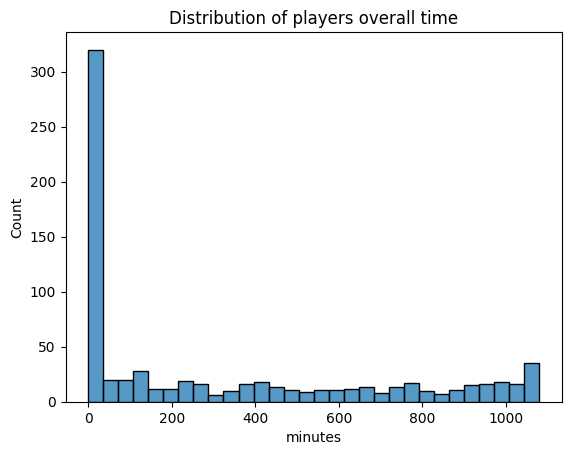

In [21]:
sns.histplot(fpl_merged.minutes,bins=30)
plt.title('Distribution of players overall time');

In [22]:

fpl_elements_copy = fpl_merged.copy()
fpl_players = fpl_elements_copy[fpl_elements_copy['minutes']>0]
print(fpl_players.shape)
fpl_players.head()


(469, 89)


,chance_of_playing_next_round,chance_of_playing_this_round,code,cost_change_event,cost_change_event_fall,cost_change_start,cost_change_start_fall,dreamteam_count,element_type,ep_next,ep_this,event_points,first_name,form,id,in_dreamteam,news,news_added,now_cost,photo,points_per_game,second_name,selected_by_percent,special,squad_number,status,team,team_code,total_points,transfers_in,transfers_in_event,transfers_out,transfers_out_event,value_form,value_season,web_name,minutes,goals_scored,assists,clean_sheets,goals_conceded,own_goals,penalties_saved,penalties_missed,...,red_cards,saves,bonus,bps,influence,creativity,threat,ict_index,starts,expected_goals,expected_assists,expected_goal_involvements,expected_goals_conceded,influence_rank,influence_rank_type,creativity_rank,creativity_rank_type,threat_rank,threat_rank_type,ict_index_rank,ict_index_rank_type,corners_and_indirect_freekicks_order,corners_and_indirect_freekicks_text,direct_freekicks_order,direct_freekicks_text,penalties_order,penalties_text,expected_goals_per_90,saves_per_90,expected_assists_per_90,expected_goal_involvements_per_90,expected_goals_conceded_per_90,goals_conceded_per_90,now_cost_rank,now_cost_rank_type,form_rank,form_rank_type,points_per_game_rank,points_per_game_rank_type,selected_rank,selected_rank_type,starts_per_90,clean_sheets_per_90,plural_name_short
1,50.0,25.0,205651,0,0,-2,2,0,4,0.2,0.2,0,Gabriel,0.0,8,False,Hamstring injury - 50% chance of playing,2023-10-24T23:30:07.618920Z,78,205651.jpg,2.6,Fernando de Jesus,1.9,False,None,d,1,3,18,402085,990,519830,6264,0.0,2.3,G.Jesus,362,1,1,2,4,0,0,0,...,0,0,2,51,67.8,58.7,144.0,26.9,4,1.71,0.30,2.01,4.22,276,33,210,33,70,25,194,30,NaN,,NaN,,NaN,,0.43,0.0,0.07,0.50,1.05,0.99,15,6,737,94,182,24,132,22,0.99,0.50,FWD
2,100.0,75.0,205533,0,0,2,-2,1,4,7.2,5.8,1,Eddie,6.7,13,False,,2023-11-09T08:30:08.250179Z,57,205533.jpg,4.2,Nketiah,10.2,False,None,a,1,3,50,1378997,49726,771129,54755,1.2,8.8,Nketiah,766,5,2,6,5,0,0,0,...,0,0,5,159,179.4,90.6,272.0,53.4,9,3.14,0.31,3.45,5.63,121,14,145,16,27,13,59,13,NaN,,NaN,,NaN,,0.37,0.0,0.04,0.41,0.66,0.59,86,27,12,3,52,10,38,6,1.06,0.70,FWD
4,100.0,100.0,476344,0,0,0,0,0,4,0.0,0.0,0,Jhon,0.0,44,False,,2023-10-29T22:00:09.647546Z,50,476344.jpg,2.5,Durán,0.2,False,None,a,2,7,15,43196,798,35237,891,0.0,3.0,Duran,68,2,0,0,0,0,0,0,...,0,0,3,55,72.6,14.2,55.0,13.7,0,0.73,0.01,0.74,1.12,267,32,350,47,190,41,298,40,NaN,,NaN,,NaN,,0.97,0.0,0.01,0.98,1.48,0.00,209,46,696,81,189,25,314,50,0.00,0.00,FWD
5,NaN,NaN,178301,0,0,4,-4,2,4,5.2,5.2,6,Ollie,5.2,60,True,,None,84,178301.jpg,6.7,Watkins,43.4,False,None,a,2,7,80,3586462,69170,1655531,65564,0.6,9.5,Watkins,1040,6,8,2,17,0,0,0,...,0,0,9,268,348.4,240.3,515.0,110.4,12,6.89,1.55,8.44,15.02,9,2,32,2,2,2,4,2,NaN,,NaN,,2.0,,0.60,0.0,0.13,0.73,1.30,1.47,8,3,35,6,4,2,5,2,1.04,0.17,FWD
7,NaN,NaN,128340,0,0,-3,3,0,4,0.5,-0.5,0,Kieffer,0.0,76,False,,None,47,128340.jpg,1.0,Moore,0.2,False,None,a,3,91,5,13627,500,37818,680,0.0,1.1,Moore,83,0,0,0,1,0,0,0,...,0,0,0,10,3.0,17.2,45.0,6.3,0,0.47,0.31,0.78,1.69,433,50,332,44,212,44,366,46,NaN,,NaN,,NaN,,0.51,0.0,0.34,0.85,1.83,1.08,317,62,645,75,402,51,296,46,0.00,0.00,FWD


Boxplot of overall data

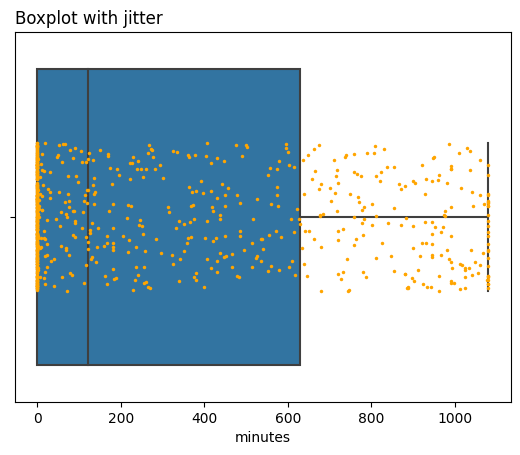

In [23]:

ax = sns.boxplot(x=fpl_elements['minutes'])
# add stripplot
ax = sns.stripplot(x=fpl_elements['minutes'], color="orange", jitter=0.2, size=2.5)

# add title
plt.title("Boxplot with jitter", loc="left")

# show the graph
plt.show()

Boxplot after zero minutes excluded

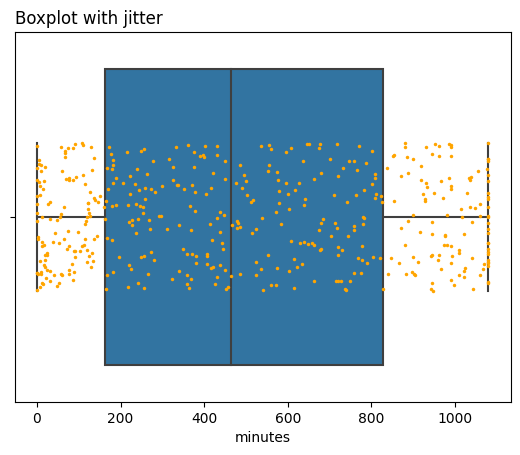

In [24]:

ax = sns.boxplot(x='minutes' ,data=fpl_players)
# add stripplot
ax = sns.stripplot(x='minutes' ,data=fpl_players, color="orange", jitter=0.2, size=2.5)

# add title
plt.title("Boxplot with jitter", loc="left")

# show the graph
plt.show()

# Visuval representation of players performance

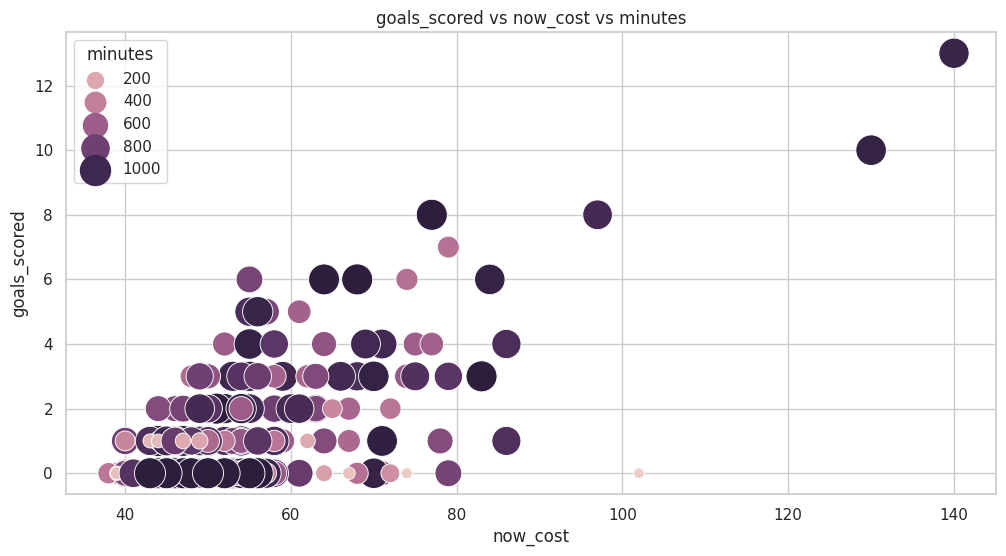

In [25]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
ax=sns.scatterplot(
    x=fpl_players['now_cost'],
    y=fpl_players['goals_scored'],
    size=fpl_players['minutes'],
    hue=fpl_players['minutes'],
    sizes=(50, 500),
    alpha=1)

plt.title('goals_scored vs now_cost vs minutes');



In [55]:
fig = px.scatter(x=fpl_players['now_cost'],
                 y=fpl_players['total_points'],
                 size=fpl_players['minutes'],
                 color=fpl_players['plural_name_short'],
                 hover_name=fpl_players['first_name'],log_x=True, size_max=20,
                 labels = {'x':'now_cost','y':'total_points','size':'minutes','color':'player_type'})
fig.update_layout(title="Interactive Bubble chart to show the performance of the players")

fig.show()

# Extracting the columns that are important for performance analysis

In [27]:
columns = ['id','first_name','second_name','web_name','minutes', 'goals_scored',
           'assists','now_cost','yellow_cards', 'red_cards','points_per_game',
           'expected_goals', 'expected_assists','own_goals','element_type','points_per_game',
           'total_points','plural_name_short','goals_conceded','penalties_saved','saves']

fpl_performance = fpl_players[columns]
fpl_performance.head()


,id,first_name,second_name,web_name,minutes,goals_scored,assists,now_cost,yellow_cards,red_cards,points_per_game,expected_goals,expected_assists,own_goals,element_type,points_per_game,total_points,plural_name_short,goals_conceded,penalties_saved,saves
1,8,Gabriel,Fernando de Jesus,G.Jesus,362,1,1,78,2,0,2.6,1.71,0.30,0,4,2.6,18,FWD,4,0,0
2,13,Eddie,Nketiah,Nketiah,766,5,2,57,2,0,4.2,3.14,0.31,0,4,4.2,50,FWD,5,0,0
4,44,Jhon,Durán,Duran,68,2,0,50,2,0,2.5,0.73,0.01,0,4,2.5,15,FWD,0,0,0
5,60,Ollie,Watkins,Watkins,1040,6,8,84,1,0,6.7,6.89,1.55,0,4,6.7,80,FWD,17,0,0
7,76,Kieffer,Moore,Moore,83,0,0,47,0,0,1.0,0.47,0.31,0,4,1.0,5,FWD,1,0,0


In [28]:
print(fpl_performance.shape)
fpl_performance.info()

(469, 21)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 469 entries, 1 to 741
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 469 non-null    int64 
 1   first_name         469 non-null    object
 2   second_name        469 non-null    object
 3   web_name           469 non-null    object
 4   minutes            469 non-null    int64 
 5   goals_scored       469 non-null    int64 
 6   assists            469 non-null    int64 
 7   now_cost           469 non-null    int64 
 8   yellow_cards       469 non-null    int64 
 9   red_cards          469 non-null    int64 
 10  points_per_game    469 non-null    object
 11  expected_goals     469 non-null    object
 12  expected_assists   469 non-null    object
 13  own_goals          469 non-null    int64 
 14  element_type       469 non-null    int64 
 15  points_per_game    469 non-null    object
 16  total_points       469 non-null   

In [29]:

grouped = fpl_performance.groupby('plural_name_short')[['now_cost','goals_scored','assists','saves','goals_conceded','minutes','total_points']] \
                          .agg( ['mean', 'sum', 'count', 'min', 'max'])
grouped

now_cost                       goals_scored             \
                        mean    sum count min  max         mean  sum count   
plural_name_short                                                            
DEF                45.409938   7311   161  38   79     0.260870   42   161   
FWD                56.915254   3358    59  43  140     1.915254  113    59   
GKP                46.185185   1247    27  39   56     0.000000    0    27   
MID                53.585586  11896   222  43  130     0.882883  196   222   

                            assists                         saves             \
                  min max      mean  sum count min max       mean  sum count   
plural_name_short                                                              
DEF                 0   2  0.496894   80   161   0   6   0.000000    0   161   
FWD                 0  13  0.830508   49    59   0   8   0.000000    0    59   
GKP                 0   0  0.000000    0    27   0   0  27.925926  754    27   
MID                 0  10  0.878378  195   222   0   8   0.000000    0   222   

                          goals_conceded                         minutes  \
                  min max           mean   sum count min max        mean   
plural_name_short                                                          
DEF                 0   0       9.689441  1560   161   0  31  553.279503   
FWD                 0   0       7.779661   459    59   0  25  432.237288   
GKP                 1  57      13.703704   370    27   1  31  800.000000   
MID                 0   0       7.572072  1681   222   0  29  450.270270   

                                         total_points                       
                     sum count min   max         mean   sum count min  max  
plural_name_short                                                           
DEF                89078   161   1  1080    18.360248  2956   161  -1   69  
FWD                25502    59   1  1068    24.101695  1422    59   1   96  
GKP                21600    27  90  1080    28.740741   776    27   2   56  
MID                99960   222   1  1080    20.409910  4531   222   1  101

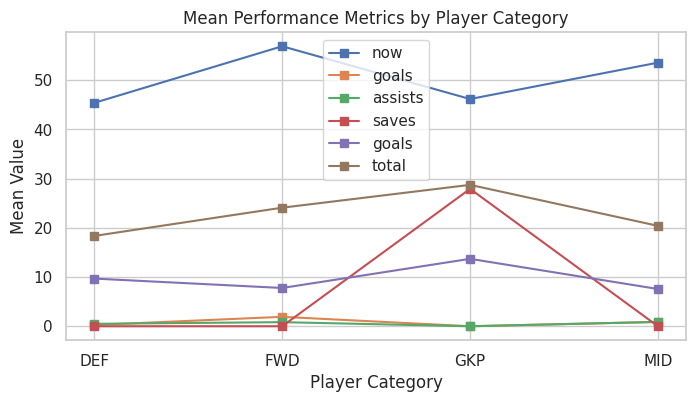

In [30]:
#import matplotlib.pyplot as plt

# Flatten the MultiIndex columns for simplicity
grouped.columns = ['_'.join(col).strip() for col in grouped.columns.values]

# Plotting
categories = grouped.index

plt.figure(figsize=(8, 4))

# Specify the metrics to plot (excluding 'minutes_mean')
metrics_to_plot = ['now_cost_mean', 'goals_scored_mean', 'assists_mean', 'saves_mean', 'goals_conceded_mean', 'total_points_mean']

# Plot each selected metric as a line
for metric in metrics_to_plot:
    plt.plot(categories, grouped[metric], label=metric.split('_')[0], marker='s')

plt.title('Mean Performance Metrics by Player Category')
plt.xlabel('Player Category')
plt.ylabel('Mean Value')
plt.legend()
plt.show()


# Exploring the relationship between the columns

Correlation between the important columns

In [31]:

# Creating a correlation matrix for selected performance metrics
correlation_matrix = fpl_performance[['first_name','second_name','web_name','minutes',
                                      'goals_scored','assists','now_cost','yellow_cards','saves',
                                     'expected_goals', 'expected_assists','own_goals','points_per_game','total_points']].corr()




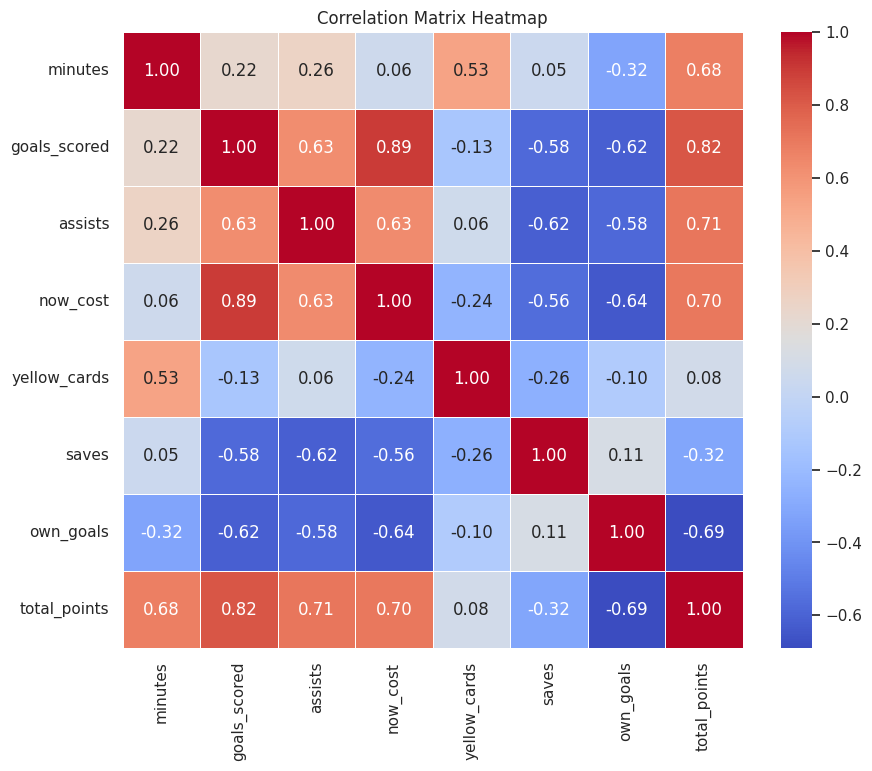

In [32]:
df = pd.DataFrame(correlation_matrix )

# Calculate the correlation matrix
corr_matrix = df.corr()



# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix.values, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5,
            xticklabels=corr_matrix.columns, yticklabels=corr_matrix.columns)
plt.title('Correlation Matrix Heatmap')
plt.show()

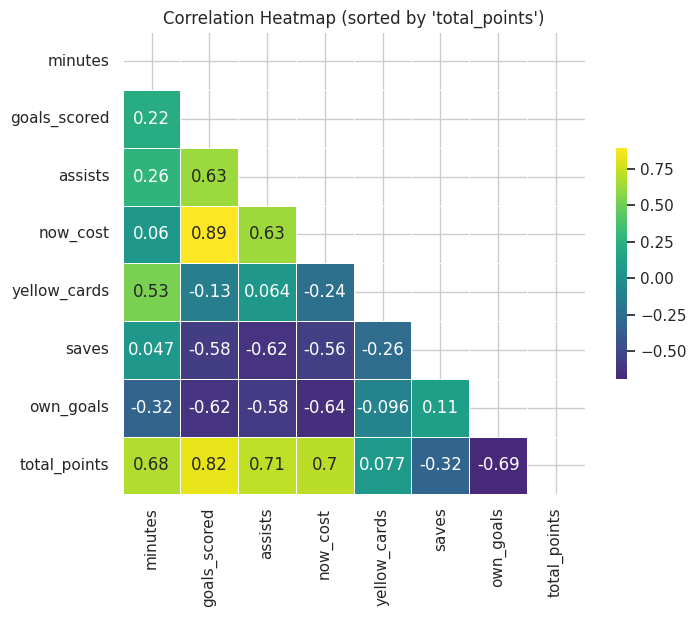

In [33]:
correlation_matrix.corr()

# Calculate the correlation matrix
corr = correlation_matrix.corr()

# Mask the upper triangle for better visualization
mask = np.triu(np.ones_like(corr, dtype=bool))

# Sort the correlation matrix by 'total_points' column


# Set up the matplotlib figure
plt.figure(figsize=(8, 6))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap="viridis", center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.title("Correlation Heatmap (sorted by 'total_points')")
plt.show()

 pair plot

In [34]:
fpl_merged_pairplot = fpl_merged[['now_cost','minutes','goals_scored','assists','total_points','plural_name_short','saves']]


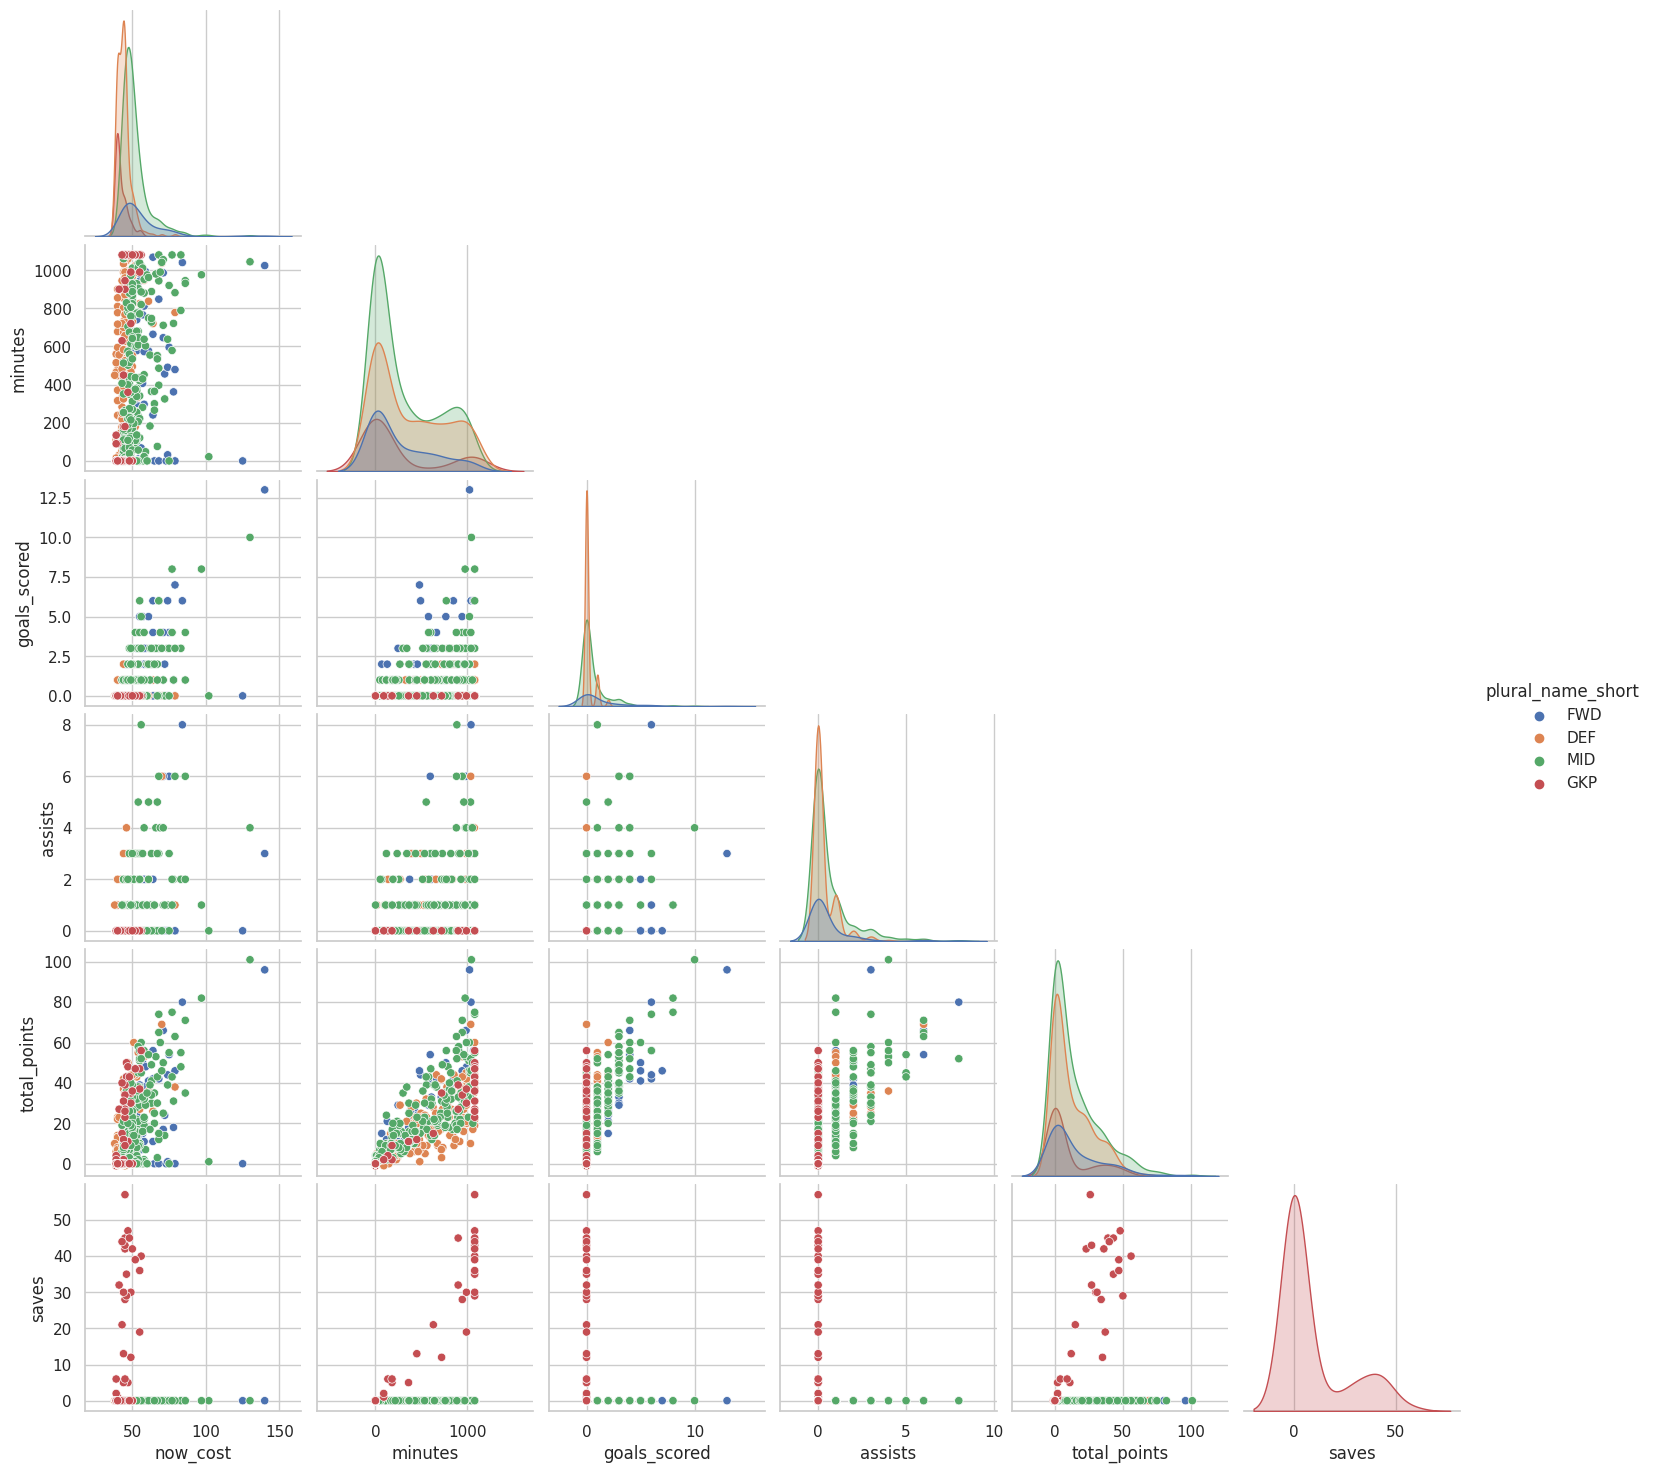

In [35]:
sns.pairplot(fpl_merged_pairplot,hue='plural_name_short',corner = True)
plt.title('')
plt.show()


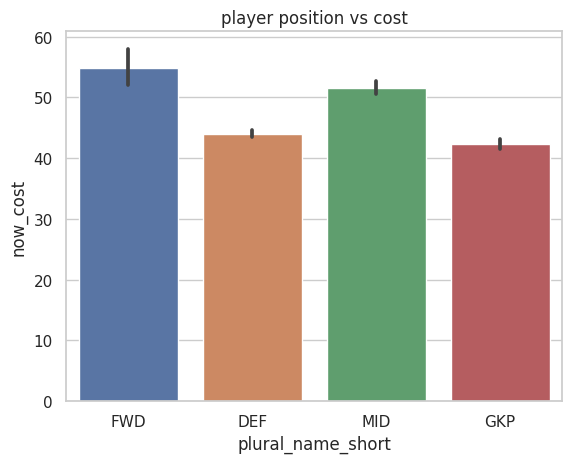

In [36]:
# over all cost spent on the players according to the positions
sns.barplot(x=fpl_merged.plural_name_short,y=fpl_merged.now_cost)
plt.title('player position vs cost');

# players comparisioon

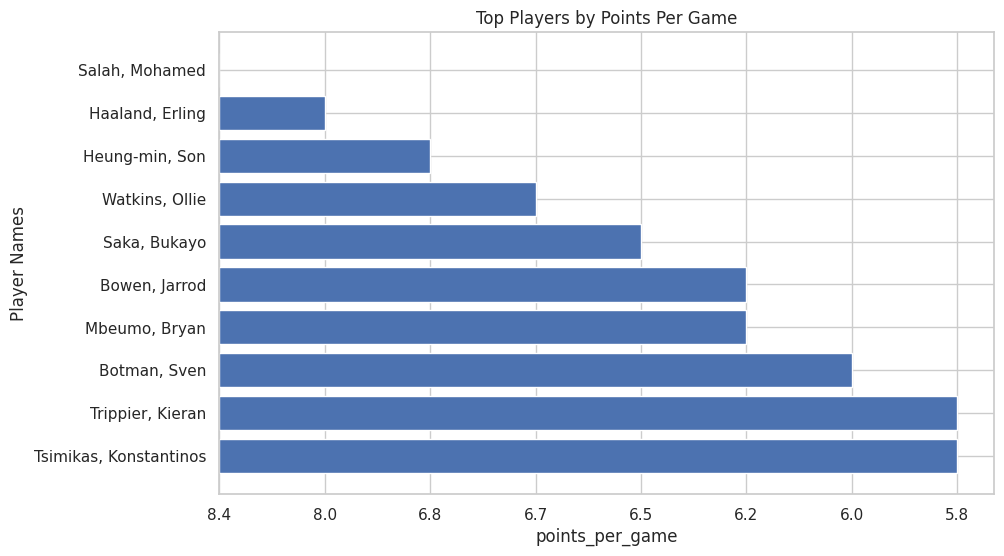

In [37]:


# Sorting the DataFrame by points_per_game to compare players
sorted_df = fpl_elements.sort_values(by='points_per_game', ascending=False)

# Selecting the top 10 players to display on the graph
top_players = sorted_df.head(10)

# Creating a bar plot for comparison
plt.figure(figsize=(10, 6))
plt.barh(top_players['second_name'] + ', ' + top_players['first_name'], top_players['points_per_game'])
#setting label names of x and y axis
plt.xlabel('points_per_game')
plt.ylabel('Player Names')
plt.title('Top Players by Points Per Game')
plt.gca().invert_yaxis()  # Invert the y-axis to show the top player at the top
plt.show()

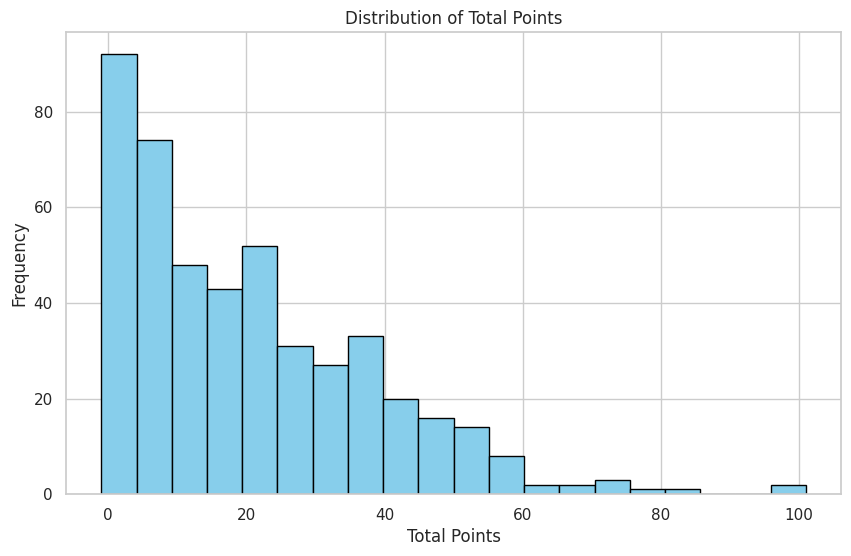

In [38]:

#Taking the measuremnts as below
plt.figure(figsize=(10, 6))
plt.hist(fpl_performance['total_points'], bins=20, color='skyblue', edgecolor='black')
plt.title("Distribution of Total Points")
plt.xlabel("Total Points")
plt.ylabel("Frequency")
plt.show()

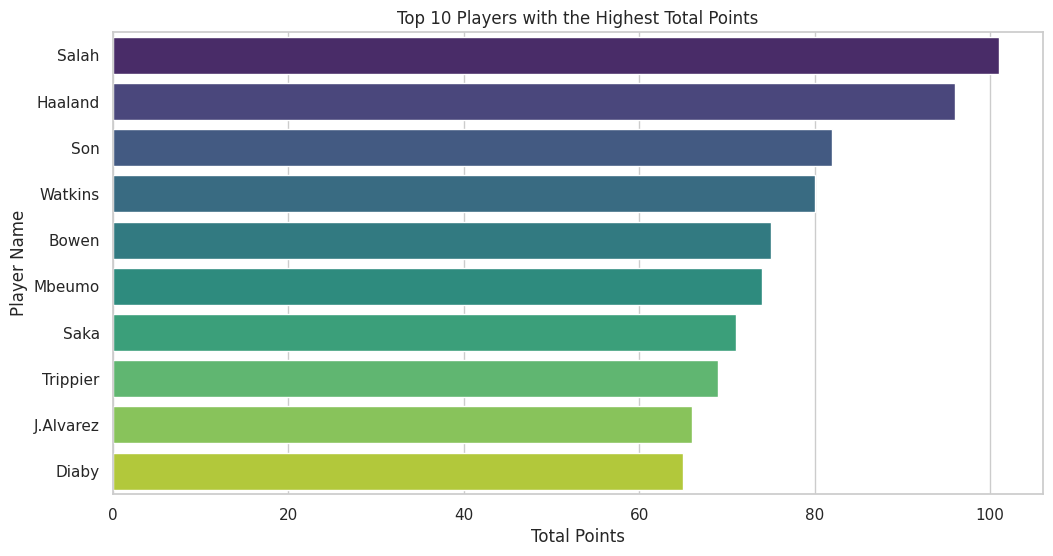

In [39]:
# Selecting the top 10 players with the highest total points from the DataFrame
top_10_players = fpl_elements.nlargest(10, 'total_points')
# Creating a figure for the plot and specify its size
plt.figure(figsize=(12, 6))

# Generating a bar plot using Seaborn to visualize the top 10 players and their total points
sns.barplot(data=top_10_players, x='total_points', y='web_name', palette='viridis')

# Setting the title for the plot, providing context for what it represents
plt.title("Top 10 Players with the Highest Total Points")
# Labelling the x and y axes for better understanding of the data
plt.xlabel("Total Points")
plt.ylabel("Player Name")
plt.show()

# Most Undervalued and clean sheet Players(MID,FWD,DEF)

Best clean sheet and highly performed players

In [41]:
# Extracting the players who are better than average players
yellow_cards_50per = np.percentile(fpl_performance.yellow_cards,50)
print('50th percentile of the yellow cards is',yellow_cards_50per,)

goals_mean =  fpl_performance.goals_scored.mean()
print('Mean for the goals_scored is',goals_mean)

assists_mean = fpl_performance.assists.mean()
print('Mean for the assists is',assists_mean)

logic = ((fpl_performance['goals_scored'] > goals_mean) & (fpl_performance['assists'] > assists_mean) &
        (fpl_performance['red_cards'] == 0) & (fpl_performance['yellow_cards'] == yellow_cards_50per))
clean_highperformed1 = fpl_performance[logic]
clean_highperformed = fpl_performance[logic].groupby('plural_name_short')


50th percentile of the yellow cards is 1.0
Mean for the goals_scored is 0.7484008528784648
Mean for the assists is 0.6908315565031983


In [42]:
bins = [40,50,60,70,80,90,100,110,120,130]

In [43]:
# number of MID players in the Best clean sheet and highly performed players
MID = clean_highperformed.get_group('MID')
MID


,id,first_name,second_name,web_name,minutes,goals_scored,assists,now_cost,yellow_cards,red_cards,points_per_game,expected_goals,expected_assists,own_goals,element_type,points_per_game,total_points,plural_name_short,goals_conceded,penalties_saved,saves
343,14,Martin,Ødegaard,Ødegaard,789,3,2,83,1,0,5.3,2.61,1.16,0,3,5.3,48,MID,7,0,0
346,19,Bukayo,Saka,Saka,945,4,6,86,1,0,6.5,4.15,3.33,0,3,6.5,71,MID,10,0,0
354,34,Leon,Bailey,Bailey,341,3,3,55,1,0,3.8,1.93,1.87,0,3,3.8,38,MID,7,0,0
396,108,Bryan,Mbeumo,Mbeumo,1080,6,3,68,1,0,6.2,7.08,3.64,0,3,6.2,74,MID,17,0,0
406,122,Simon,Adingra,Adingra,663,3,1,50,1,0,3.5,1.36,0.67,0,3,3.5,38,MID,14,0,0
413,134,Pascal,Groß,Gross,888,2,1,63,1,0,4.1,1.35,1.47,0,3,4.1,41,MID,13,0,0
416,140,Solly,March,March,555,3,1,62,1,0,5.6,2.10,0.97,0,3,5.6,39,MID,11,0,0
492,270,Bobby,De Cordova-Reid,De Cordova-Reid,608,2,1,54,1,0,2.9,2.55,0.28,0,3,2.9,32,MID,15,0,0
499,591,Willian,Borges da Silva,Willian,775,1,1,53,1,0,2.9,1.45,0.87,0,3,2.9,32,MID,11,0,0
511,308,Mohamed,Salah,Salah,1044,10,4,130,1,0,8.4,8.74,3.29,0,3,8.4,101,MID,9,0,0


In [44]:
MID['Range'] = pd.cut(MID['now_cost'], bins=bins, labels=['40-50', '51-60', '61-70', '71-80', '81-90','91-100','101-110','111-120','121-130'], right=False)
range_counts = MID['Range'].value_counts().sort_index()
print(range_counts)

40-50      1
51-60      6
61-70      5
71-80      3
81-90      3
91-100     0
101-110    0
111-120    0
121-130    0
Name: Range, dtype: int64


In [45]:
FWD = clean_highperformed.get_group('FWD')
FWD

,id,first_name,second_name,web_name,minutes,goals_scored,assists,now_cost,yellow_cards,red_cards,points_per_game,expected_goals,expected_assists,own_goals,element_type,points_per_game,total_points,plural_name_short,goals_conceded,penalties_saved,saves
5,60,Ollie,Watkins,Watkins,1040,6,8,84,1,0,6.7,6.89,1.55,0,4,6.7,80,FWD,17,0,0
8,82,Antoine,Semenyo,Semenyo,421,2,1,45,1,0,3.0,1.06,0.52,0,4,3.0,27,FWD,11,0,0
9,85,Dominic,Solanke,Solanke,1068,6,1,64,1,0,4.7,5.28,0.74,0,4,4.7,56,FWD,25,0,0
12,119,Yoane,Wissa,Wissa,992,3,2,59,1,0,4.0,4.68,0.25,0,4,4.0,48,FWD,14,0,0
16,135,João Pedro,Junqueira de Jesus,João Pedro,578,2,1,53,1,0,2.4,2.93,1.50,0,4,2.4,29,FWD,12,0,0
50,293,Darwin,Núñez Ribeiro,Darwin,596,4,6,75,1,0,4.9,5.15,0.96,0,4,4.9,54,FWD,4,0,0
54,326,Carlton,Morris,Morris,1010,3,1,53,1,0,3.8,3.90,0.62,0,4,3.8,45,FWD,21,0,0
69,437,Taiwo,Awoniyi,Awoniyi,664,4,2,64,1,0,4.2,3.72,0.40,0,4,4.2,42,FWD,11,0,0
94,590,Matheus,Santos Carneiro Da Cunha,Cunha,981,2,2,55,1,0,3.2,3.04,1.38,0,4,3.2,39,FWD,18,0,0


In [46]:
bins = [50,60,70,80,90]
FWD['Range'] = pd.cut(FWD['now_cost'], bins=bins, labels=[ '51-60', '61-70', '71-80', '81-90'], right=False)
range_counts = FWD['Range'].value_counts().sort_index()
print(range_counts)

51-60    4
61-70    2
71-80    1
81-90    1
Name: Range, dtype: int64


In [47]:
DEF = clean_highperformed.get_group('DEF')
DEF

,id,first_name,second_name,web_name,minutes,goals_scored,assists,now_cost,yellow_cards,red_cards,points_per_game,expected_goals,expected_assists,own_goals,element_type,points_per_game,total_points,plural_name_short,goals_conceded,penalties_saved,saves
189,260,Vitalii,Mykolenko,Mykolenko,717,2,1,44,1,0,5.2,0.98,0.34,0,2,5.2,42,DEF,8,0,0
244,386,Victor,Lindelöf,Lindelof,763,1,1,45,1,0,3.5,0.22,0.30,0,2,3.5,35,DEF,9,0,0
255,405,Sven,Botman,Botman,446,1,1,46,1,0,6.0,0.29,0.28,0,2,6.0,30,DEF,3,0,0


under valued players with clean sheet

In [48]:
bins = [40,50]
DEF['Range'] = pd.cut(DEF['now_cost'], bins=bins, labels=['40-50'], right=False)
range_counts = DEF['Range'].value_counts().sort_index()
print(range_counts)

40-50    3
Name: Range, dtype: int64


In [49]:
cost_mean = fpl_performance['now_cost'].mean()
clean_highperformed1[clean_highperformed1['now_cost']<cost_mean]

,id,first_name,second_name,web_name,minutes,goals_scored,assists,now_cost,yellow_cards,red_cards,points_per_game,expected_goals,expected_assists,own_goals,element_type,points_per_game,total_points,plural_name_short,goals_conceded,penalties_saved,saves
8,82,Antoine,Semenyo,Semenyo,421,2,1,45,1,0,3.0,1.06,0.52,0,4,3.0,27,FWD,11,0,0
189,260,Vitalii,Mykolenko,Mykolenko,717,2,1,44,1,0,5.2,0.98,0.34,0,2,5.2,42,DEF,8,0,0
244,386,Victor,Lindelöf,Lindelof,763,1,1,45,1,0,3.5,0.22,0.30,0,2,3.5,35,DEF,9,0,0
255,405,Sven,Botman,Botman,446,1,1,46,1,0,6.0,0.29,0.28,0,2,6.0,30,DEF,3,0,0
406,122,Simon,Adingra,Adingra,663,3,1,50,1,0,3.5,1.36,0.67,0,3,3.5,38,MID,14,0,0
589,378,Anthony,Elanga,Elanga,650,2,3,50,1,0,3.2,1.09,1.40,0,3,3.2,39,MID,9,0,0
654,570,Pablo,Sarabia,Sarabia,190,1,2,47,1,0,3.3,0.75,0.99,0,3,3.3,20,MID,1,0,0



#  Some of Best GoalKeepers

In [50]:
#goals_conceded penalties_saved saves now_cost
goals_conceded_25per = np.percentile(fpl_performance.goals_conceded,25)
print('25th percentile of the goal_conceded is',goals_conceded_25per,)
saves_mean = fpl_performance.saves.mean()
print('mean of the saves is',saves_mean)

25th percentile of the goal_conceded is 3.0
mean of the saves is 1.607675906183369


In [51]:
a = fpl_performance['goals_conceded'] < goals_conceded_25per
b = fpl_performance['saves'] > saves_mean
c = fpl_performance['now_cost']< cost_mean
GKP_undervalued = fpl_performance[a & b & c]
GKP_undervalued

,id,first_name,second_name,web_name,minutes,goals_scored,assists,now_cost,yellow_cards,red_cards,points_per_game,expected_goals,expected_assists,own_goals,element_type,points_per_game,total_points,plural_name_short,goals_conceded,penalties_saved,saves
674,116,Thomas,Strakosha,Strakosha,135,0,0,39,0,0,2.0,0.00,0.01,0,1,2.0,4,GKP,2,0,6
712,361,Stefan,Ortega Moreno,Ortega Moreno,90,0,0,39,0,0,2.0,0.00,0.00,0,1,2.0,2,GKP,1,0,2


# Model Training:Prediction of Total points through the multi linear regression is still under progress

In [52]:
X = fpl_performance[['minutes', 'goals_scored','assists','now_cost','yellow_cards','saves','own_goals']]
y = fpl_performance[['total_points']]

In [53]:
# Import necessary libraries
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)




# Model Evaluation

Mean Squared Error: 20.40501562324097
R-squared: 0.9251455093434027


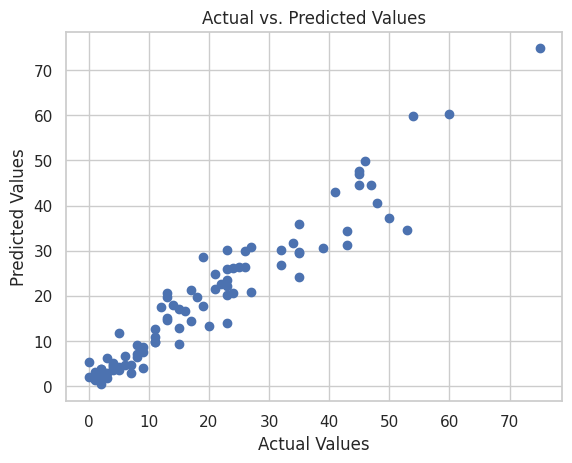

In [54]:
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

plt.scatter(y_test, y_pred)


plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()
